In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv("data/homeprices_banglore.csv")
df.head(10)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


##### PREPROCESSING & SCALING
Since our columns are on different scale it's important to perform scaling on them

In [44]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [45]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Convert target column into one dimensional array. It has became 2D due to scaling, so now we shuldda fix it

In [62]:
scaled_y.reshape(20, )

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [63]:
def batch_gradient_descent(X, y_true, epochs, lr=0.01):
    num_of_features = X.shape[1]
    
    w = np.ones(shape=(num_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples) * (X.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples) * np.sum(y_true-y_pred)
        
        w = w - w_grad * lr
        b = b - b_grad * lr
        
#       MSE - mean squared error
        cost = np.mean(np.square(y_true - y_pred))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [64]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, 
                                                           scaled_y.reshape(scaled_y.shape[0]),
                                                           500)

In [65]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

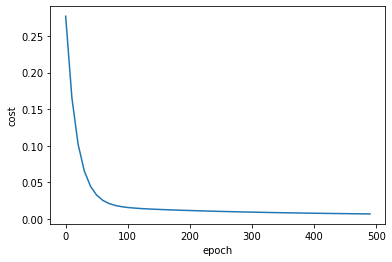

In [66]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [53]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [54]:
predict(2600, 4, w, b)

128.45484403267596

In [55]:
predict(1000, 2, w ,b)

30.253094462442355

In [56]:
predict(1500, 3, w, b)

69.47860785714694

### Stochastic Gradient Descent

In [57]:
import random

random.randint(0, 6)

2

In [85]:
def stochastc_gradient_descent(X, y_true, epochs, lr=0.01):
    num_of_features = X.shape[1]
    w = np.ones(shape=(num_of_features))
    b = 0
    
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/total_samples) * (sample_y-y_pred)
        
        w = w - w_grad * lr
        b = b - b_grad * lr
        
        cost = np.square(sample_y-y_pred)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [86]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastc_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    10_000)

In [88]:
w_sgd, b_sgd, cost_sgd

(array([0.70949084, 0.67657933]), -0.22890817672233377, 0.004513009465608622)

In [89]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

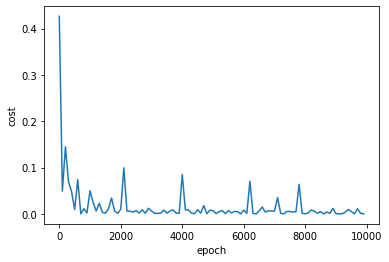

In [91]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [93]:
predict(2600, 4, w_sgd, b_sgd)

129.05149188305978

In [94]:
predict(1000, 2, w_sgd, b_sgd)

30.537552714466194

In [95]:
predict(1500, 3, w_sgd, b_sgd)

69.88611579260521

#### Mini Batch Gradient Descent

In [126]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [127]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
scaled_X, scaled_y.reshape(scaled_y.shape[0],), epochs=120, batch_size=5)

In [128]:
w, b, cost

(array([0.71020721, 0.6781662 ]), -0.23347427303302007, 0.0028646176044633347)

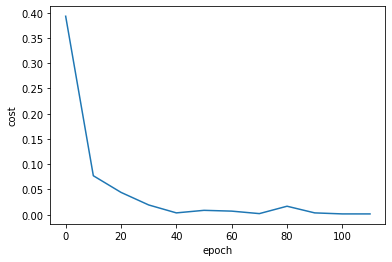

In [129]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [132]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [133]:
predict(2600, 4, w ,b)

128.65576669917894

In [134]:
predict(1000,2,w,b)

29.981356324150784

In [135]:
predict(1500,3,w,b)

69.40015050971206